# Fully Connected Neural Network (FCNN) Tutorial

---

## Introduction

In this step-by-step tutorial, we'll build a **Fully Connected Neural Network (FCNN)** from scratch. We'll delve into:

- **Detailed mathematical explanations**
- **By-hand calculations**
- **Code examples in Python using NumPy and PyTorch**
- **Visualizations to aid understanding**

By the end of this tutorial, you'll understand how FCNNs work internally and how to implement them in code. 

---

### Network Configuration:

- **Input Layer**: 1 neuron
- **Hidden Layer**: 1 layer with 2 neurons
- **Output Layer**: 1 neuron

### Model Equation:


$y = W_2 \cdot \operatorname{ReLU}(W_1 \cdot x + b_1) + b_2$

### Goals:

1. **Understand the forward pass** by computing activations manually.
2. **Perform the backward pass** by computing gradients manually.
3. **Update the weights using gradient descent**.
4. **Implement everything in PyTorch**.
5. **Visualize how the FCNN processes data**.

---

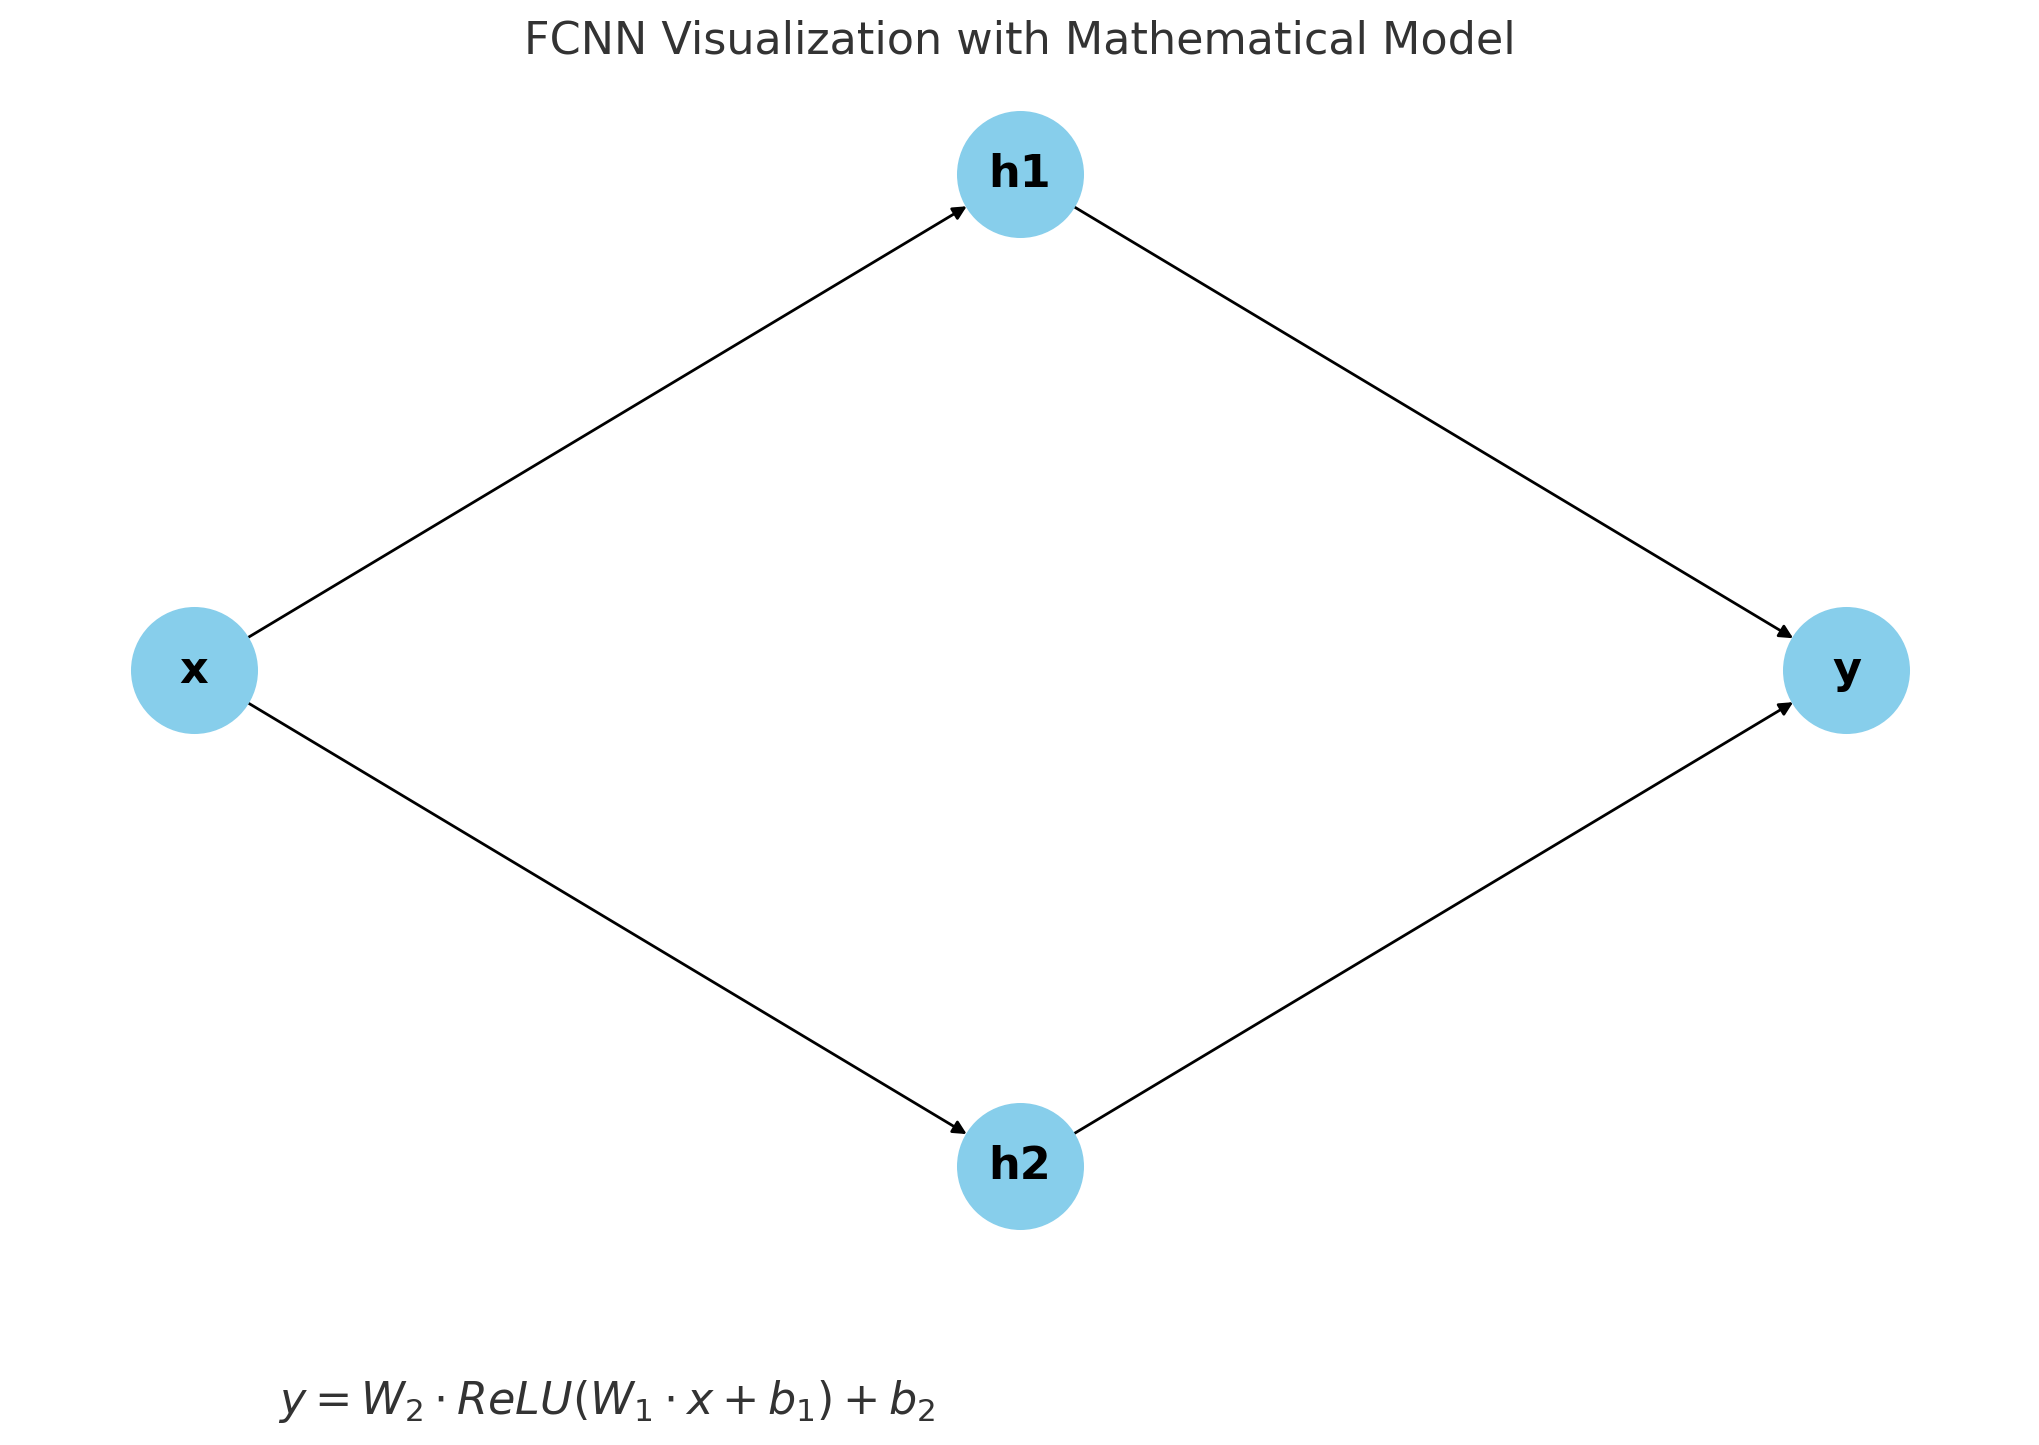

In [1]:
from IPython.display import Image
Image(filename='imgs/FCNN Visualization.png')

<a id="step1"></a>
## 1. Manual Forward Pass

### 1.1 Define the Network Structure

Our FCNN has:

- **Input Layer**: $( x )$ (scalar input)
- **Hidden Layer**:
  - 2 neurons
  - Activation function: **ReLU**
- **Output Layer**:
  - 1 neuron
  - Linear activation (no activation function)

### 1.2 Initial Values

We'll use the following initial parameters for simplicity:

- **Input**:
  - $( x = 1 )$
- **Weights and Biases**:
  - Hidden layer weights: $W_1 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$
  - Hidden layer biases: $b_1 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$
  - Output layer weights: $W_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$
  - Output layer bias: $b_2 = 0$
- **Target Output**:
  - $y_{\text{target}} = 5$

### 1.3 Forward Pass Equations

#### Hidden Layer Pre-Activation

Compute the weighted sum for the hidden layer (before activation):

$h_1 = W_1 \cdot x + b_1 = \begin{bmatrix} 1 \\ -1 \end{bmatrix} \cdot 1 + \begin{bmatrix} 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$

#### Apply ReLU Activation

Apply the ReLU function to the hidden layer outputs:

$a = \text{ReLU}(h_1) = \text{ReLU}\left( \begin{bmatrix} 1 \\ -1 \end{bmatrix} \right) = \begin{bmatrix} \max(0, 1) \\ \max(0, -1) \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

#### Output Layer Calculation

Compute the final output:

$y = W_2^\top \cdot a + b_2 = \begin{bmatrix} 1 & 1 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 0 = 1$

### 1.4 Manual Forward Pass in Python

In [2]:
import numpy as np

# Initialize values
x = 1
W1 = np.array([[1], [-1]])  # Shape: (2,1)
b1 = np.array([[0], [0]])   # Shape: (2,1)
W2 = np.array([[1], [1]])   # Shape: (2,1)
b2 = 0

# Forward pass
# Hidden layer pre-activation
h = W1 * x + b1  # Broadcasting
print("Hidden layer pre-activation (h):\n", h)

# ReLU activation
a = np.maximum(0, h)
print("Hidden layer activation (a):\n", a)

# Output layer
y = W2.T @ a + b2
print("Output (y):", y[0,0])

Hidden layer pre-activation (h):
 [[ 1]
 [-1]]
Hidden layer activation (a):
 [[1]
 [0]]
Output (y): 1


<a id="step2"></a>
## 2. Compute the Loss

We'll use the [**Mean Squared Error (MSE)**](https://en.wikipedia.org/wiki/Mean_squared_error) loss function:

$L = (y - y_{\text{target}})^2$

Substitute the computed output and target:

$L = (1 - 5)^2 = 16$

### Python Code for Loss:

In [3]:
# Target output
y_target = 5

# Compute the loss
loss = (y - y_target)**2
print("Loss (L):", loss[0,0])

Loss (L): 16


<a id="step3"></a>
## 3. Understanding Gradient Descent

### 3.1 What is Gradient Descent?

**Gradient Descent** is an optimization algorithm used to minimize the loss function in machine learning models. It works by iteratively adjusting the model's parameters (weights and biases) in the direction that reduces the loss.

### 3.2 Why Do We Compute Gradients?

The **gradient** of the loss function with respect to the model's parameters tells us the direction and rate at which the loss increases. By computing the gradient, we know how to adjust the parameters to **decrease** the loss.

- **Gradient**: A vector of partial derivatives of the loss function with respect to each parameter.
- **Purpose**: Indicates the slope of the loss function and the direction to move to reduce the loss.

### 3.3 How Does Gradient Descent Use Gradients?

In each iteration of gradient descent:

1. **Compute the Gradients**: Calculate the gradient of the loss function with respect to each parameter.
2. **Update the Parameters**: Adjust the parameters in the opposite direction of the gradient.
   - The size of the adjustment is controlled by the **learning rate** (\( \eta \)).
3. **Repeat**: Continue this process until the loss function reaches a minimum or for a set number of iterations.

### 3.4 Gradient Descent Update Rule

For each parameter \( \theta \) (which can be a weight or bias), the update rule is:

$\theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \frac{\partial L}{\partial \theta}$

Where:

- $\eta$ is the learning rate.
- $\frac{\partial L}{\partial \theta}$ is the gradient of the loss with respect to $\theta$.

---

<a id="step4"></a>
## 4. Manual Backward Pass

Now that we understand why we're computing gradients and how gradient descent uses them, let's compute the gradients manually.

### 4.1 Compute Gradients

#### Gradient of Loss w.r.t Output ($ y $):

$
\frac{\partial L}{\partial y} = 2(y - y_{\text{target}}) = 2(1 - 5) = -8
$

#### Gradient w.r.t Output Layer Weights ($ W_2 $):

$
\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial W_2} = \frac{\partial L}{\partial y} \cdot a
$ (1)

---

#### 4.1.1 Why $\frac{\partial y}{\partial W_2} = a$:

In our neural network, the output $ y $ is computed as:

$
y = W_2^\top a + b_2
$

Where:
- $ W_2 $ is the weight vector of the output layer (shape: $ (2, 1) $)
- $ a $ is the activation vector from the hidden layer after applying the ReLU activation (shape: $ (2, 1) $)
- $ b_2 $ is the bias of the output layer (scalar)

#### 4.1.2 Computing the Gradient $\frac{\partial y}{\partial W_2}$

We want to find the derivative of $ y $ with respect to each element of $ W_2 $:

$
\frac{\partial y}{\partial W_2} = \begin{bmatrix}
\frac{\partial y}{\partial w_{2,1}} \\
\frac{\partial y}{\partial w_{2,2}}
\end{bmatrix}
$

Given that:

$
y = w_{2,1} a_1 + w_{2,2} a_2 + b_2
$

The partial derivatives are:

- For $ w_{2,1} $:

  $
  \frac{\partial y}{\partial w_{2,1}} = \frac{\partial}{\partial w_{2,1}} (w_{2,1} a_1 + w_{2,2} a_2 + b_2) = a_1
  $

- For $ w_{2,2} $:

  $
  \frac{\partial y}{\partial w_{2,2}} = \frac{\partial}{\partial w_{2,2}} (w_{2,1} a_1 + w_{2,2} a_2 + b_2) = a_2
  $

Therefore:

$
\frac{\partial y}{\partial W_2} = \begin{bmatrix}
a_1 \\
a_2
\end{bmatrix} = a
$

**Thus, $\frac{\partial y}{\partial W_2} = a$.**

---

So Substituting (1):

$
\frac{\partial L}{\partial W_2} = -8 \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} -8 \\ 0 \end{bmatrix}
$

#### Gradient w.r.t Output Layer Bias ($ b_2 $):

$
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial b_2} = \frac{\partial L}{\partial y} \cdot 1 = -8
$


#### Gradient w.r.t Hidden Layer Activation ($ a $):

$
\frac{\partial L}{\partial a} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial a} = \frac{\partial L}{\partial y} \cdot W_2
$



Substituting:

$
\frac{\partial L}{\partial a} = -8 \cdot \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} -8 \\ -8 \end{bmatrix}
$

#### Gradient w.r.t Hidden Layer Pre-Activation ($ h $):

Apply the derivative of ReLU:

$
\frac{\partial L}{\partial h} = \frac{\partial L}{\partial a} \odot \text{ReLU}'(h)
$

Where:

$
\text{ReLU}'(h_i) = \begin{cases}
1, & \text{if } h_i > 0 \\
0, & \text{if } h_i \leq 0
\end{cases}
$

Since $ h = \begin{bmatrix} 1 \\ -1 \end{bmatrix} $, the derivative is:

$
\text{ReLU}'(h) = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$

Therefore:

$
\frac{\partial L}{\partial h} = \begin{bmatrix} -8 \\ -8 \end{bmatrix} \odot \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} -8 \\ 0 \end{bmatrix}
$

#### Gradient w.r.t Hidden Layer Weights ($ W_1 $):

$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial h} \cdot \frac{\partial h}{\partial W_1} = \frac{\partial L}{\partial h} \cdot x
$

Substituting:

$
\frac{\partial L}{\partial W_1} = \begin{bmatrix} -8 \\ 0 \end{bmatrix} \cdot 1 = \begin{bmatrix} -8 \\ 0 \end{bmatrix}
$

#### Gradient w.r.t Hidden Layer Biases ($ b_1 $):

$
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial h} \cdot \frac{\partial h}{\partial b_1} = \frac{\partial L}{\partial h} \cdot 1 = \begin{bmatrix} -8 \\ 0 \end{bmatrix}
$

### 4.2 Summary of Gradients

- $ \frac{\partial L}{\partial W_2} = \begin{bmatrix} -8 \\ 0 \end{bmatrix} $
- $ \frac{\partial L}{\partial b_2} = -8 $
- $ \frac{\partial L}{\partial W_1} = \begin{bmatrix} -8 \\ 0 \end{bmatrix} $
- $ \frac{\partial L}{\partial b_1} = \begin{bmatrix} -8 \\ 0 \end{bmatrix} $

### 4.2 Python Code for Backward Pass

In [4]:
# Compute gradients
dL_dy = 2*(y - y_target)  # Scalar

# Gradients w.r.t W2 and b2
dL_dW2 = a * dL_dy    # Element-wise multiplication, Shape: (2,1)
dL_db2 = dL_dy        # Scalar

# Gradients w.r.t a1
dL_da1 = W2 * dL_dy   # Element-wise multiplication, Shape: (2,1)

# ReLU derivative
ReLU_derivative = (h > 0).astype(float)  # Shape: (2,1)

# Gradients w.r.t h1
dL_dh1 = dL_da1 * ReLU_derivative  # Element-wise multiplication

# Gradients w.r.t W1 and b1
dL_dW1 = dL_dh1 * x  # Scalar multiplication
dL_db1 = dL_dh1      # Same as dL_dh1

print("Gradient w.r.t W2 (dL/dW2):\n", dL_dW2)
print("Gradient w.r.t b2 (dL/db2):", dL_db2)
print("Gradient w.r.t W1 (dL/dW1):\n", dL_dW1)
print("Gradient w.r.t b1 (dL/db1):\n", dL_db1)

Gradient w.r.t W2 (dL/dW2):
 [[-8]
 [ 0]]
Gradient w.r.t b2 (dL/db2): [[-8]]
Gradient w.r.t W1 (dL/dW1):
 [[-8.]
 [-0.]]
Gradient w.r.t b1 (dL/db1):
 [[-8.]
 [-0.]]


<a id="step5"></a>
## 5. Update the Weights

Using **Gradient Descent** with a learning rate $\eta = 0.1$:

$W_{\text{new}} = W_{\text{old}} - \eta \cdot \frac{\partial L}{\partial W}$

### Python Code for Weight Update

In [5]:
# Learning rate
learning_rate = 0.1

# Update weights and biases
W2_new = W2 - learning_rate * dL_dW2
b2_new = b2 - learning_rate * dL_db2
W1_new = W1 - learning_rate * dL_dW1
b1_new = b1 - learning_rate * dL_db1

print("Updated W2:\n", W2_new)
print("Updated b2:", b2_new)
print("Updated W1:\n", W1_new)
print("Updated b1:\n", b1_new)

Updated W2:
 [[1.8]
 [1. ]]
Updated b2: [[0.8]]
Updated W1:
 [[ 1.8]
 [-1. ]]
Updated b1:
 [[0.8]
 [0. ]]


**Note:** This gradient descent is just one optimization option for neural networks. For more options, please visit the [PyTorch Optimization Documentation](https://pytorch.org/docs/stable/optim.html).

<a id="step6"></a>
## 6. Implementing in PyTorch

Now, let's implement the same network using PyTorch, which will handle automatic differentiation for us.

### 6.1 Import Libraries

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

### 6.2 Define the Network Class

In [7]:
class SimpleFCNN(nn.Module):
    def __init__(self):
        super(SimpleFCNN, self).__init__()
        self.fc1 = nn.Linear(1, 2)  # Input layer to hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2, 1)  # Hidden layer to output layer

        # Initialize weights manually
        with torch.no_grad():
            self.fc1.weight = nn.Parameter(torch.tensor([[1.0], [-1.0]]))  # Shape: (2,1)
            self.fc1.bias = nn.Parameter(torch.tensor([0.0, 0.0]))
            self.fc2.weight = nn.Parameter(torch.tensor([[1.0, 1.0]]))    # Shape: (1,2)
            self.fc2.bias = nn.Parameter(torch.tensor([0.0]))

    def forward(self, x):
        h = self.fc1(x)
        a = self.relu(h)
        y = self.fc2(a)
        return y

### 6.3 Instantiate the Model and Define Loss Function

In [8]:
# Instantiate model
model = SimpleFCNN()

# Define loss function
criterion = nn.MSELoss()

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

### 6.4 Forward Pass

In [9]:
# Input and target
x = torch.tensor([[1.0]])
y_target = torch.tensor([[5.0]])

# Forward pass
y = model(x)
loss = criterion(y, y_target)
print("Output (y):", y.item())
print("Loss (L):", loss.item())

Output (y): 1.0
Loss (L): 16.0


### 6.5 Backward Pass and Weight Update

In [10]:
# Zero gradients
optimizer.zero_grad()

# Backward pass
loss.backward()

# Update weights
optimizer.step()

# Print updated weights and biases
print("Updated fc1 weights:\n", model.fc1.weight.data)
print("Updated fc1 biases:\n", model.fc1.bias.data)
print("Updated fc2 weights:\n", model.fc2.weight.data)
print("Updated fc2 biases:\n", model.fc2.bias.data)

Updated fc1 weights:
 tensor([[ 1.8000],
        [-1.0000]])
Updated fc1 biases:
 tensor([0.8000, 0.0000])
Updated fc2 weights:
 tensor([[1.8000, 1.0000]])
Updated fc2 biases:
 tensor([0.8000])


<a id="step7"></a>
## 7. Visualizing FCNN Outputs

To better understand how the FCNN processes data, let's visualize how the output changes with different inputs.

### 7.1 Create Input Data

We'll create a range of inputs from -2 to 2.

In [15]:
import matplotlib.pyplot as plt

# Generate input data
x_vals = torch.linspace(-2, 2, 100).unsqueeze(1)  # Shape: (100,1)

### 7.2 Pass Data Through the Network

In [11]:
# Get outputs
with torch.no_grad():
    y_vals = model(x_vals)

### 7.3 Plot the Results

In [12]:
# Convert tensors to numpy arrays for plotting
x_np = x_vals.numpy()
y_np = y_vals.numpy()

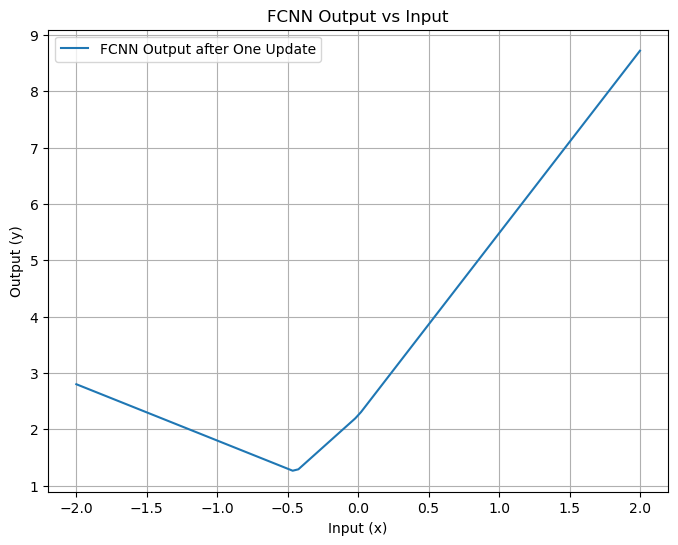

In [13]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(x_np, y_np, label='FCNN Output after One Update')
plt.title('FCNN Output vs Input')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.grid(True)
plt.legend()
plt.show()

**Discussion:**

- The plot shows how the FCNN's output varies with the input after one weight update.
- You can observe how the network starts to adjust its output towards the target.

---


<a id="step8"></a>
## 8. Updating Model Weights over Multiple Epochs with Varied Input Data

To see how the model learns and generalizes beyond a single input \(x = 1\), we'll train it over multiple epochs using a **range of input values**. We'll also track the loss over time to understand how the model improves.

### 8.1 Multiple Inputs

Instead of just training the model with $(x = 1)$, let's provide multiple inputs such as $([1.0, 0.5, -0.5, -1.0])$ and their corresponding targets $[5.0, 2.5, -2.5, -5.0]$. This will allow the model to learn a more general relationship between the inputs and outputs.

In [11]:
# Define multiple input values and corresponding target values
x_train = torch.tensor([[1.0], [0.5], [-0.5], [-1.0]])
y_targets = torch.tensor([[5.0], [2.5], [-2.5], [-5.0]])


In [12]:
# Number of epochs
epochs = 100

- **Epochs**: One epoch refers to one complete pass through the entire training dataset.

In [13]:
# Store loss values
losses = []

# Training loop
for epoch in range(epochs):
    total_loss = 0
    
    for i in range(len(x_train)):
        # Forward pass
        y = model(x_train[i].unsqueeze(0))  # Use one input at a time
        loss = criterion(y, y_targets[i].unsqueeze(0))  # Corresponding target
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Track total loss
        total_loss += loss.item()
    
    # Store the average loss for this epoch
    losses.append(total_loss / len(x_train))
    
    # Print average loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {total_loss / len(x_train)}")

Epoch 0/100, Loss: 9.360902093350887
Epoch 10/100, Loss: 21.80202615261078
Epoch 20/100, Loss: 19.078654289245605
Epoch 30/100, Loss: 19.078401565551758
Epoch 40/100, Loss: 19.078401565551758
Epoch 50/100, Loss: 19.078401565551758
Epoch 60/100, Loss: 19.078401565551758
Epoch 70/100, Loss: 19.078401565551758
Epoch 80/100, Loss: 19.078401565551758
Epoch 90/100, Loss: 19.078401565551758


### 8.2 Visualizing the Loss Over Time

We’ll now plot the loss as it evolves over the 100 epochs to observe how the model improves during training.

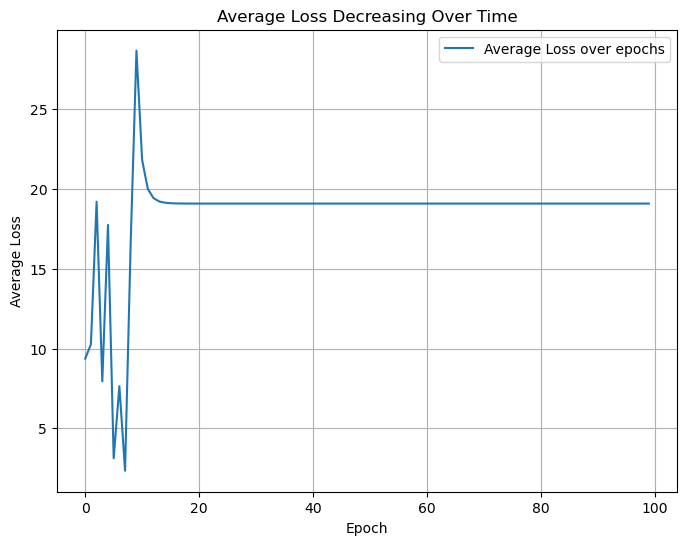

In [16]:
# Plot loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses, label='Average Loss over epochs')
plt.title('Average Loss Decreasing Over Time')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.legend()
plt.show()

- The plot shows how the model’s loss decreases over time as it learns to better fit the input-output relationships.

### 8.3 Evaluating the Final Model

After training the model for multiple epochs, let's evaluate its performance by checking how it predicts the outputs for a range of input values.

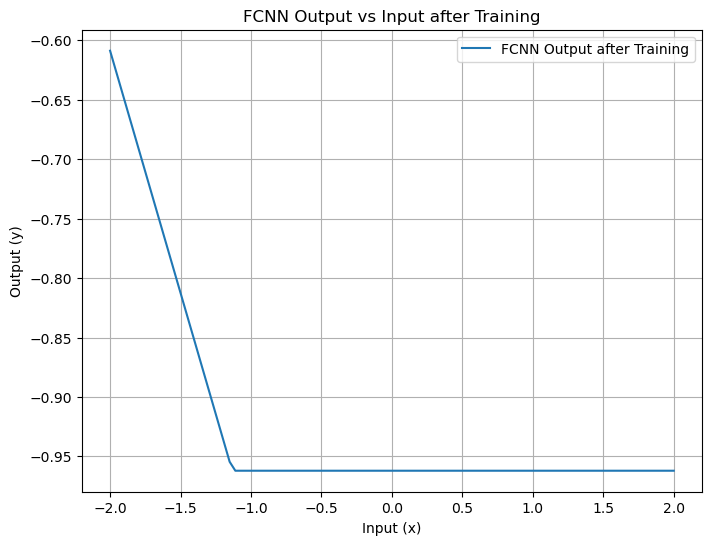

In [17]:
# Generate input data for evaluation
x_vals = torch.linspace(-2, 2, 100).unsqueeze(1)  # Shape: (100,1)

# Get outputs after training
with torch.no_grad():
    y_vals = model(x_vals)

# Convert tensors to numpy arrays for plotting
x_np = x_vals.numpy()
y_np = y_vals.numpy()

# Plot the final model output
plt.figure(figsize=(8, 6))
plt.plot(x_np, y_np, label='FCNN Output after Training')
plt.title('FCNN Output vs Input after Training')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.grid(True)
plt.legend()
plt.show()

#### Discussion:
- This plot shows how the trained model predicts outputs for a range of input values after multiple weight updates.
- We can visually assess how well the model has learned the relationship between the inputs and the corresponding targets.

----



<a id="conclusion"></a>
## Conclusion

In this tutorial, we've:

1. **Performed a manual forward pass**, calculating the activations step by step.
2. **Computed the loss** using the Mean Squared Error function.
3. **Performed a manual backward pass**, calculating gradients for each parameter.
4. **Updated the weights** using gradient descent.
5. **Implemented the FCNN in PyTorch**, utilizing automatic differentiation.
6. **Visualized how the FCNN processes data and learns**

---

## Next Steps

- **Experiment** with different learning rates and observe the effect on convergence.
- **Modify** the network by adding more layers or neurons and see how it affects the output.
- **Train** the network on a real dataset to perform regression or classification tasks.

---

**Happy Learning!**

---

# Additional Notes

- Ensure you have the necessary libraries installed:

  ```bash
  pip install numpy torch matplotlib
  ```

- Feel free to modify the code and experiment with different parameters to deepen your understanding.